# **Retención de clientes**

# Instalaciones e importaciones

In [1]:
pip install geopandas

In [2]:
pip install xgboost

In [3]:
pip install imblearn

In [43]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import random
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTEENN
import numpy as np
from numpy import array
from urllib.request import urlretrieve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
pd.set_option('display.max_columns', None)

In [5]:
import warnings
import sys
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

# Leyendo datos

In [6]:
df = pd.read_excel('Telco_customer_churn.xlsx')
#demographics = pd.read_excel('Telco_customer_churn_demographics.xlsx')
#location = pd.read_excel('Telco_customer_churn_location.xlsx')
#population = pd.read_excel('Telco_customer_churn_population.xlsx')
#services = pd.read_excel('Telco_customer_churn_services.xlsx')
#status = pd.read_excel('Telco_customer_churn_status.xlsx')

In [7]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# Análisis exploratorio

In [8]:
df.describe()
# De estas columnas, las importantes estan despues de Tenure.
# En promedio los clientes tienen 32 meses, con una deviación grande de 24 meses.
# Los cargos en promedio son de $64 dólares con una desviación de 30 dólares.

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [9]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [10]:
df["Total Charges"] = pd.to_numeric(df['Total Charges'], errors='coerce')
# Aparecieron nulos que vamos a quitar porque son pocos y además todavia son clientes.
df.loc[df ['Total Charges'].isnull() == True]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [11]:
df.dropna(subset=['Total Charges'], inplace=True)

In [12]:
# Valores nulos
round(100*(df.isnull().sum())/len(df),2)
# Hay muchos valores nulos en la columna de motivos, pero es normal, ya que ese porcentaje de clientes que siguen activos.

CustomerID            0.00
Count                 0.00
Country               0.00
State                 0.00
City                  0.00
Zip Code              0.00
Lat Long              0.00
Latitude              0.00
Longitude             0.00
Gender                0.00
Senior Citizen        0.00
Partner               0.00
Dependents            0.00
Tenure Months         0.00
Phone Service         0.00
Multiple Lines        0.00
Internet Service      0.00
Online Security       0.00
Online Backup         0.00
Device Protection     0.00
Tech Support          0.00
Streaming TV          0.00
Streaming Movies      0.00
Contract              0.00
Paperless Billing     0.00
Payment Method        0.00
Monthly Charges       0.00
Total Charges         0.00
Churn Label           0.00
Churn Value           0.00
Churn Score           0.00
CLTV                  0.00
Churn Reason         73.42
dtype: float64

## Visualizaciones iniciales

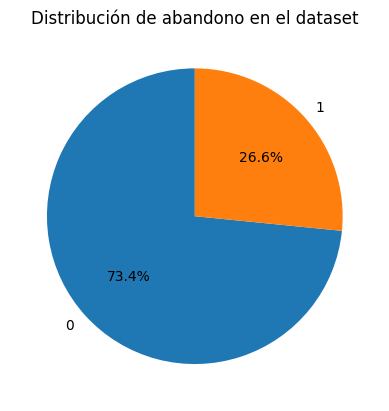

In [13]:

df['Churn Value'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de abandono en el dataset')
plt.ylabel('')
plt.show()
# Los datos no estan balanceados, por lo que al hacer el modelo tendremos que balancearlos.

Text(0.5, 1.0, 'Boxplot del Cargo del recibo')

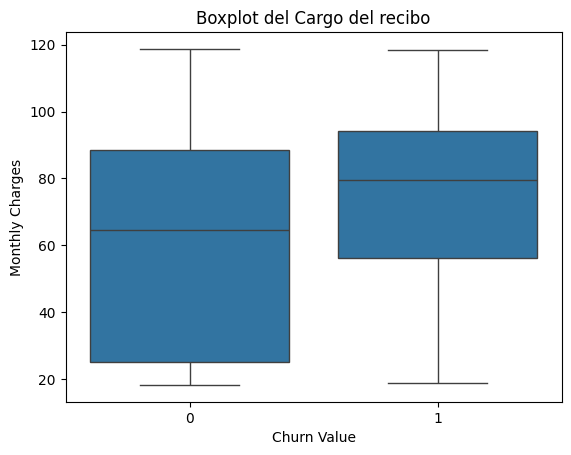

In [14]:
sn.boxplot(data=df, x="Churn Value", y="Monthly Charges").set_title("Boxplot del Cargo del recibo")
# Se puedever que los clientes que abandonaron pagaban más en promedio.

Text(0.5, 1.0, 'Boxplot de Antigüedad')

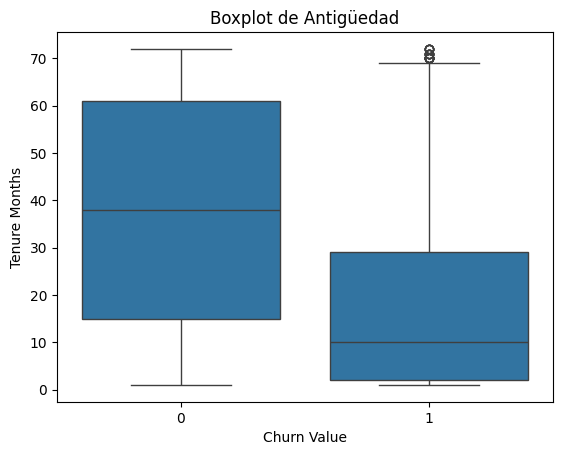

In [15]:
sn.boxplot(data=df, x="Churn Value", y="Tenure Months").set_title("Boxplot de Antigüedad")
# Los clientes que abandonan son los que tienen pocos meses.

Text(0.5, 1.0, 'Boxplot de CLTV')

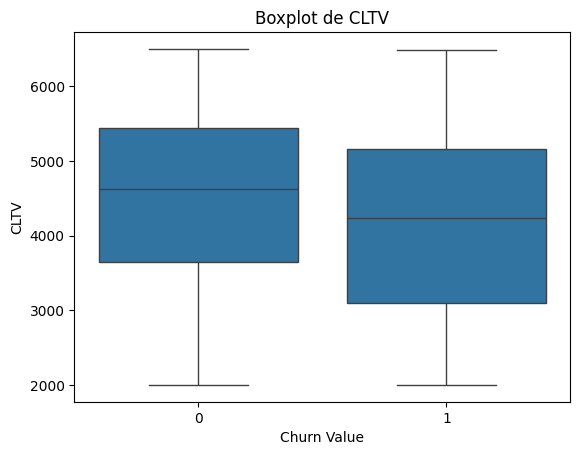

In [16]:
sn.boxplot(data=df, x="Churn Value", y="CLTV").set_title("Boxplot de CLTV")
# Los clientes que se van tienen una media menor y del segundo cuartil hacia la media hay mucha distancia,
# por lo que dejan menos dinero a la empresa
# Por otro lado, los lcientes que se quedan son mas rentables

<Axes: xlabel='Monthly Charges', ylabel='Total Charges'>

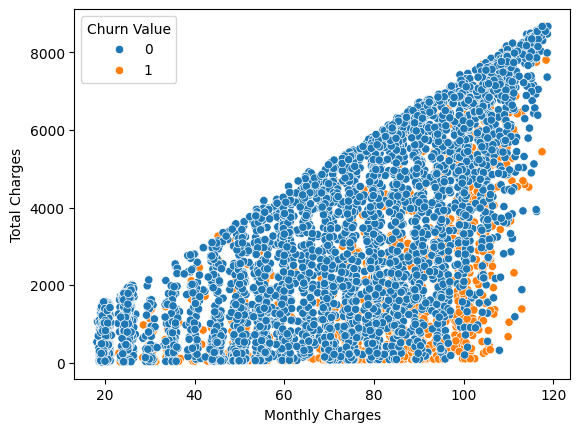

In [17]:
sn.scatterplot(data=df, x="Monthly Charges", y="Total Charges", hue="Churn Value")
# Conforme aumenta la cuenta, aumentan los cargos totales junto con la taza de abandono

In [18]:
# Vamos a simplificar los motivos de abandono para visualizarlos.
reason_mapping = {
    'Competitor made better offer': 'Competitor Offer',
    'Moved': 'Customer Moved',
    'Competitor had better devices': 'Competitor Offer',
    'Competitor offered higher download speeds': 'Competitor Offer',
    'Competitor offered more data': 'Competitor Offer',
    'Price too high': 'Pricing',
    'Product dissatisfaction': 'Product/Service',
    'Service dissatisfaction': 'Product/Service',
    'Lack of self-service on Website': 'Service Availability',
    'Network reliability': 'Service Quality',
    'Limited range of services': 'Service Availability',
    'Lack of affordable download/upload speed': 'Service Quality',
    'Long distance charges': 'Pricing',
    'Extra data charges': 'Pricing',
    "Don't know": 'Other',
    'Poor expertise of online support': 'Customer Support',
    'Poor expertise of phone support': 'Customer Support',
    'Attitude of service provider': 'Customer Support',
    'Attitude of support person': 'Customer Support',
    'Deceased': 'Other'
}

df['Generalized Reason'] = df['Churn Reason'].map(reason_mapping)

In [19]:
url = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_state_500k.zip"
us_states = gpd.read_file(url)
california = us_states[us_states['STUSPS'] == 'CA']
df_geo = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.Longitude, df.Latitude))

Text(0.5, 1.0, 'Motivos de abandono y su ubicación')

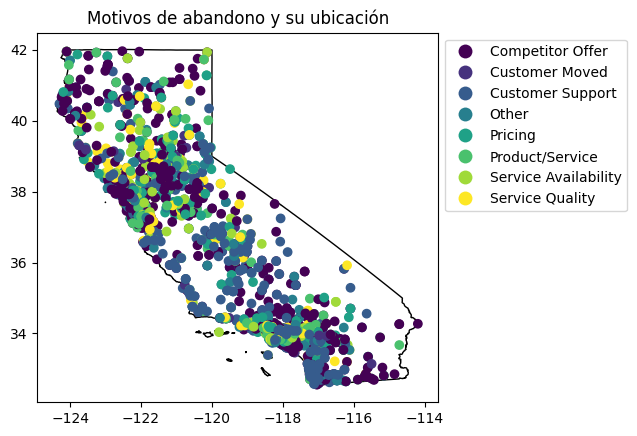

In [20]:
# Hacemos un mapa para ver algun patrón
axis = california.plot(
    color = "white", edgecolor = "black"
)

df_geo.plot(ax=axis, column="Generalized Reason", legend=True, cmap="viridis")
legend = axis.get_legend()
legend.set_bbox_to_anchor((1, 1))  # Adjust the position here

plt.title("Motivos de abandono y su ubicación")
# Podemos ver que en la parte superior de California, nuestro competidor esta llevandose a nuestros clientes
# En el centro, hay mas amarillos por lo que el servicio no es tan bueno o tiene fallas
# En el sur hay mucho azul, por indicando que el servicio a cliente no es agradable

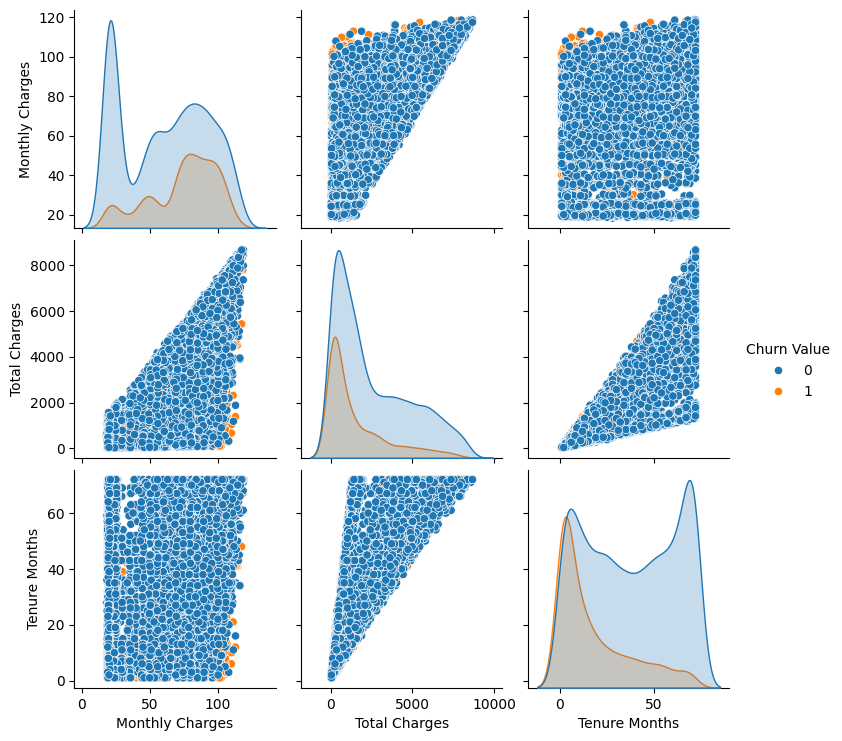

In [21]:
df_numeric = df[['Monthly Charges', 'Total Charges', 'Churn Label','Tenure Months' ,'Churn Value']]
sn.pairplot(df_numeric, hue = "Churn Value")

##  Limpieza de datos

In [22]:
# Ahora vamos a ir seleccionando las columnas importante para ir viendo relaciones
def dummies(columns,df):
    for column in columns:
        vector = pd.get_dummies(df[column], drop_first=True, dtype=int)
        df[column] = vector

columnas = ['Gender','Partner','Senior Citizen','Dependents','Phone Service']
dummies(columnas,df)

In [23]:
# Hay que dejar solo si y no para estas columnas
def change_yes_no(columns, df):
    for column in columns:
        df[column] = df[column].replace({'No internet service': 'No', 'No phone service': "No"})
    dummies(columns,df)


columns2 = ['Multiple Lines','Online Security','Online Backup',
            'Device Protection','Tech Support','Streaming TV','Streaming Movies','Paperless Billing']
change_yes_no(columns2, df)

In [24]:
# Agrupar los meses en grupos de 12, en vez de tenerlo en meses pasarlo a años.
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['Tenure Group'] = pd.cut(df['Tenure Months'], range(1, 80, 12), right=False, labels=labels)

In [25]:
df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Churn Label'], inplace=True)

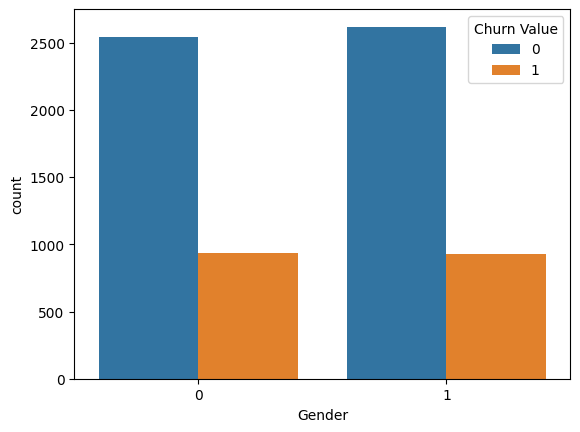

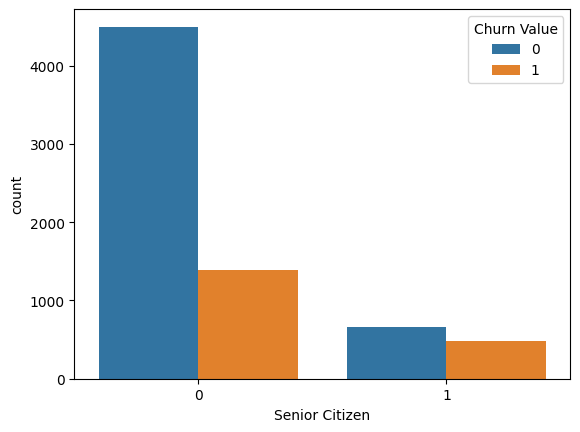

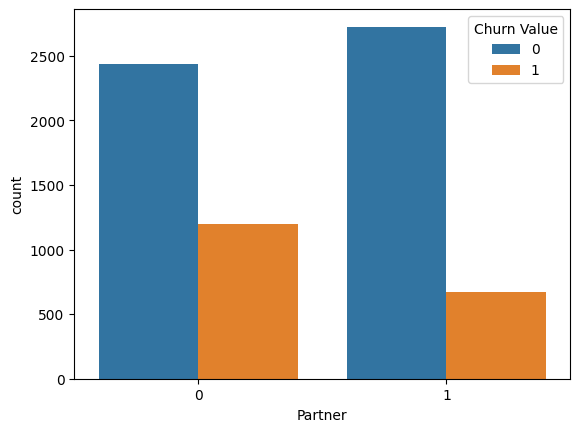

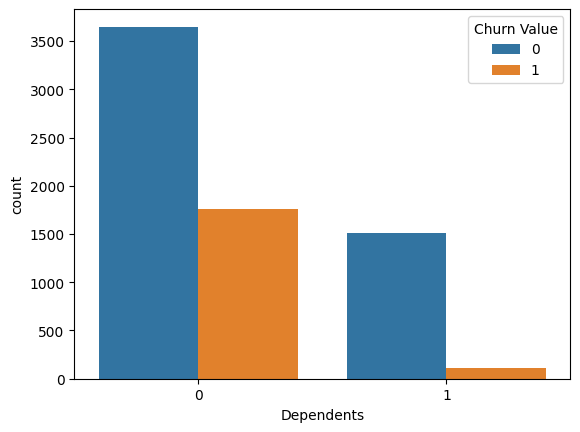

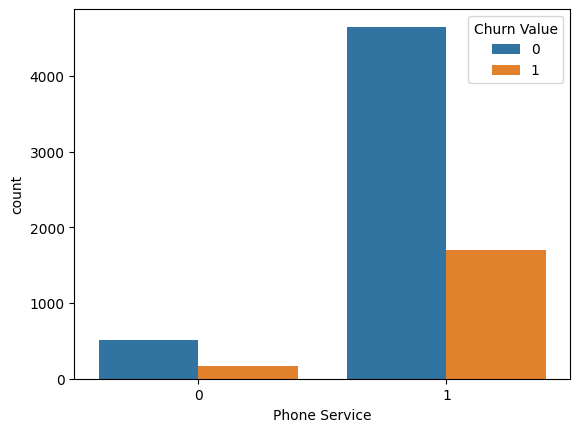

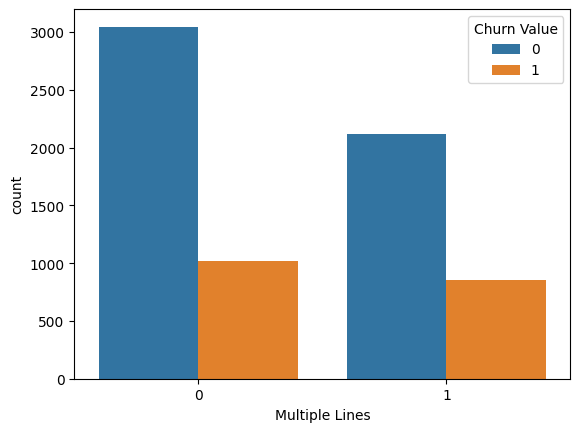

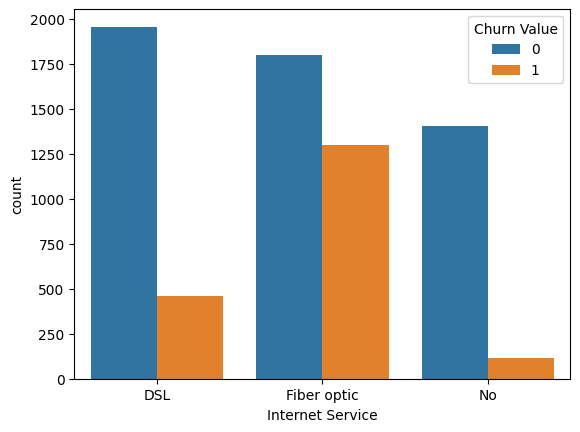

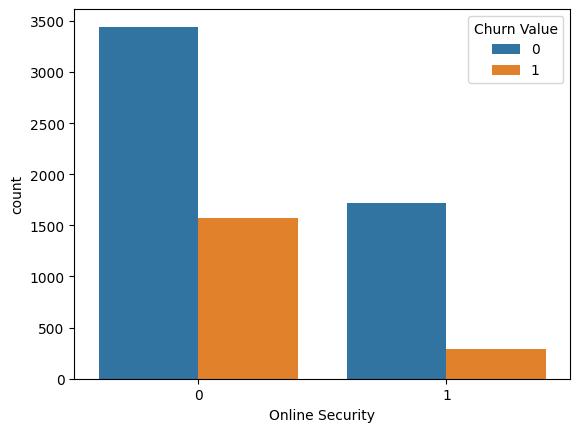

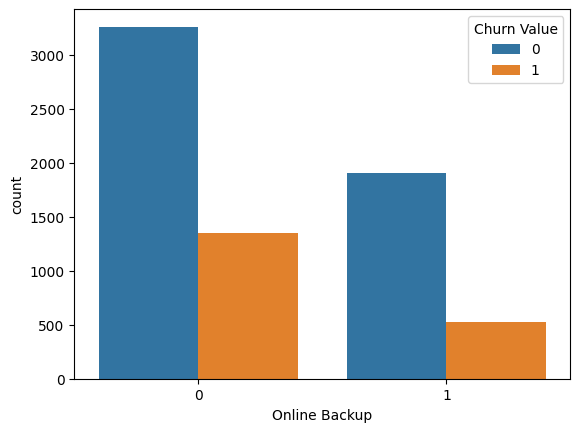

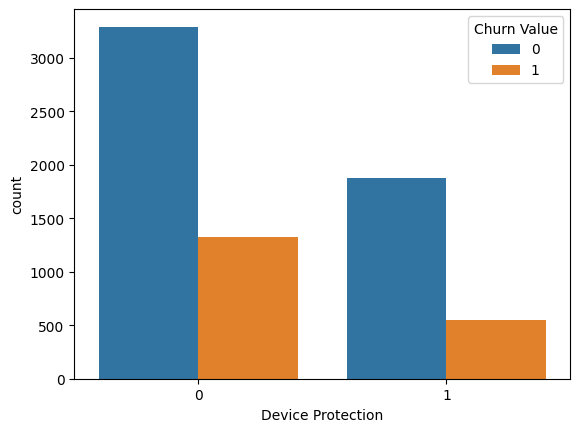

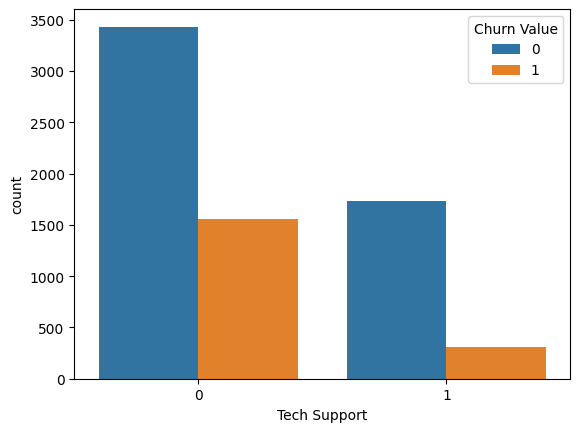

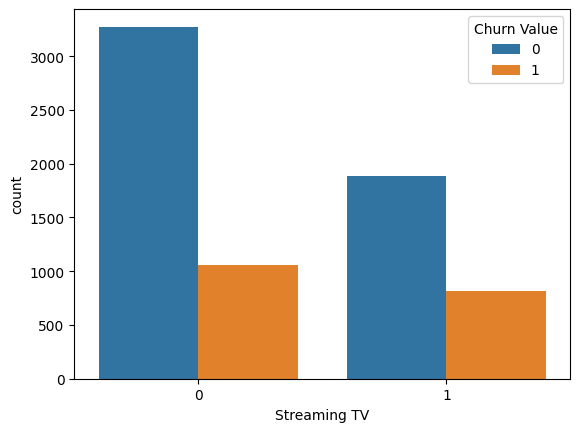

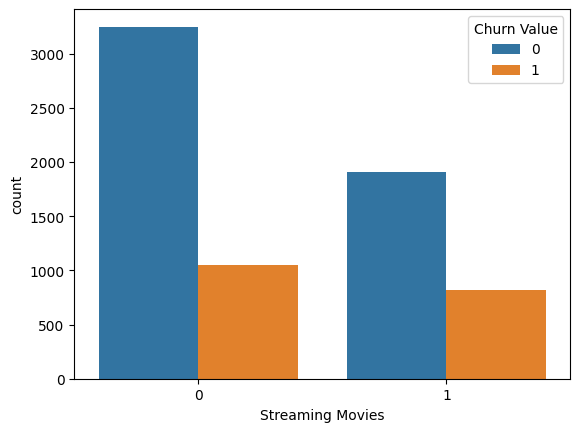

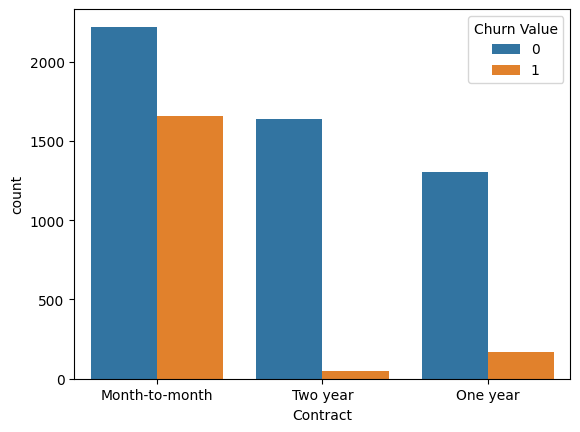

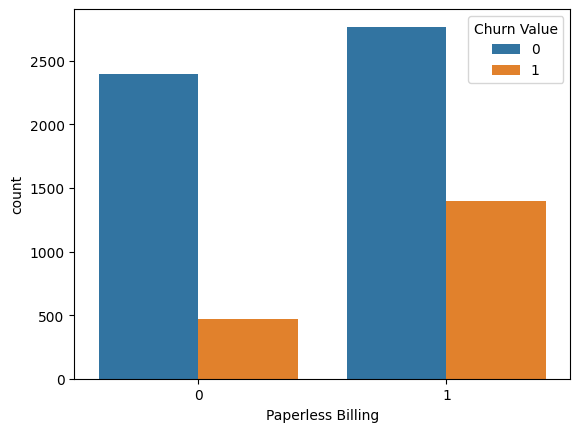

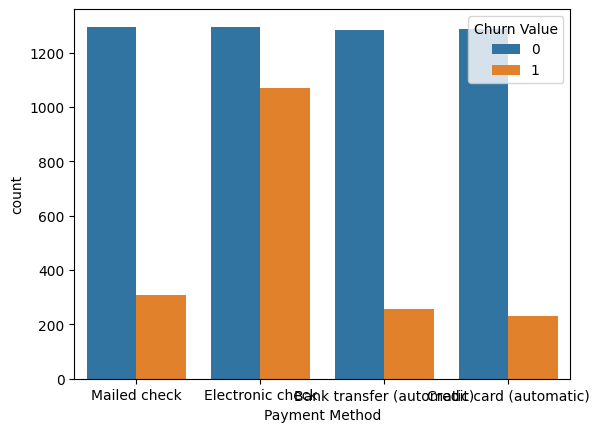

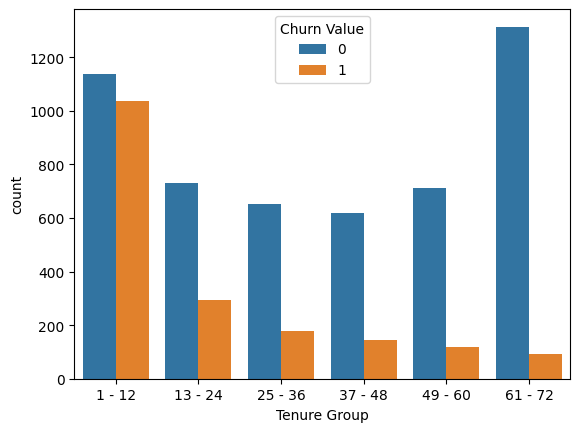

In [26]:
for i, predictor in enumerate(df.drop(columns=['Tenure Months', 'Monthly Charges', 'Total Charges','Churn Value' ,'Churn Score','Generalized Reason' ,'CLTV', 'Churn Reason'])):
    plt.figure(i)
    sn.countplot(data=df, x=predictor, hue='Churn Value')

# De todas las figuras, lo mas relvantes es:
# Los seniors citizen son mas propensos a abandonar la empresa
# Los solteros tambien son mas probables a abandonar la empresa
# Los dependientes tambien son propensos a abandonar la empresa
# Los que NO tienen online security pareciera que tambien
# Los que NO tienen tech support tambien son mas probables
# Los que SI tienen fibra optica son mas propnesos a abandonar
# Los que pagan mes a mes tambien son mas propensos a abandonar
# Los de electronic check tambien.
# Los que tienen Paparless billing tambien
# El genero no tiene mucho que ver

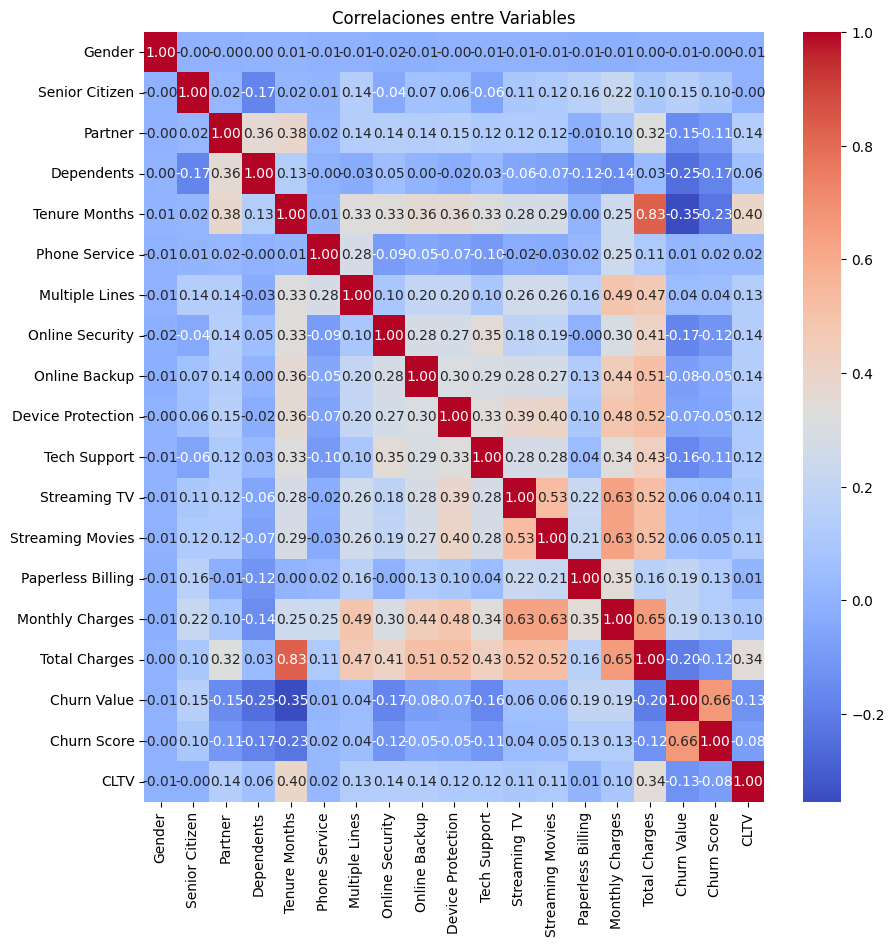

In [27]:
correlation_matrix = df.select_dtypes(include=['float64','int32' ,'int64']).corr()
plt.figure(figsize=(10, 10))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre Variables')
plt.show()

## Últimos cambios al dataset

In [28]:
# vamos a quitar los motivos (aunque pueden ser útiles para otro tipo de análisis)
df.drop(columns=['Churn Reason', 'Generalized Reason', 'Tenure Months'], inplace=True)

In [29]:
# Las demás columnas categóricas las vamos a hacer dummies con get_dummies.
columns3 = ['Internet Service','Contract','Payment Method','Tenure Group']
dummy_df = pd.get_dummies(df[columns3],dtype=int)
df.drop(columns=columns3, inplace=True)
df = pd.concat([df, dummy_df], axis=1)

In [30]:
# Antes de hacer el modelo, voy a esconder unos datos para probarlos con el modelo FINAL.
indices_ = df.sample(n=100).index
df_hidden = df.loc[indices_]
df = df.drop(indices_)

In [31]:
# Escalando las columnas numéricas
numeric = ['Monthly Charges', 'Total Charges',
       'Churn Score', 'CLTV']
scaler = MinMaxScaler()

df[numeric] = scaler.fit_transform(df[numeric])

# Neural Network

In [32]:
X = df.drop(columns=["Churn Value"])
y = df["Churn Value"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
X.shape[1]

33

In [35]:
model = keras.Sequential([
   keras.layers.Dense(20, input_shape=(33,), activation="relu"),
   keras.layers.Dense(1, activation="sigmoid")

])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
174/174 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.7587
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8188
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8429
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8678
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8858
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.8972
Epoch 7/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9071
Epoch 8/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9080
Epoch 9/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9106
Epoch 10/50
174/174 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9160

In [36]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9193


[0.18757665157318115, 0.9192501902580261]

In [37]:
yp = model.predict(X_test)
yp

44/44 [==============================] - 0s 2ms/step


array([[2.5954181e-02],
       [5.9534794e-01],
       [1.7214296e-04],
       ...,
       [2.2465685e-02],
       [2.0079538e-05],
       [1.5599156e-02]], dtype=float32)

In [38]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1026
           1       0.84      0.84      0.84       361

    accuracy                           0.92      1387
   macro avg       0.90      0.90      0.90      1387
weighted avg       0.92      0.92      0.92      1387



Text(50.722222222222214, 0.5, 'Truth')

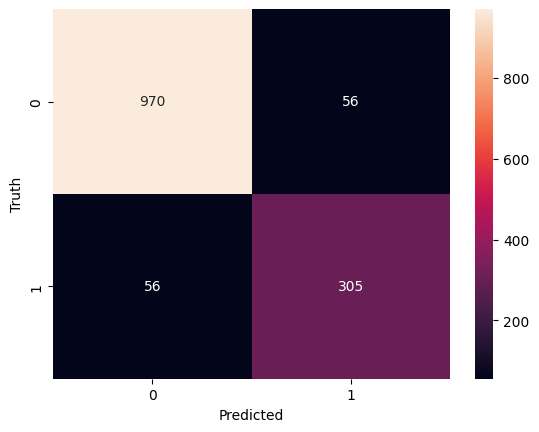

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure()
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
print("Accuracy")
(907+307) / (970+56+56+305)
# Cuantas adivino correctas de todo

Accuracy


0.875270367700072

In [42]:
print("Precision for 0th class")
970 / (970+56)
# Cuantas correctas para la clase 0
# |

Precision for 0th class


0.9454191033138402

In [45]:
print("Precision for 1st class")
305 / (305+56)
# Cuantas correctas para la clase 1
# |

Precision for 1st class


0.8448753462603878

In [46]:
print("Recall for 0th class")
970 / (970+56)
# --

Recall for 0th class


0.9454191033138402

In [47]:
print("Recall for 0th class")
305 / (305+56)
# --

Recall for 0th class


0.8448753462603878